
# K-means Clustering



Import libraries:

In [1]:
%matplotlib inline
import numpy as np
import scipy.io
import scipy.cluster
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans

Functions

In [12]:
##########################################################################FUNCTIONS#########
#plot cluster
def plotcluster(data,labels,symbols,colors,sizemarker):
  i=0

  for point in data:
    plt.plot( point[0],point[1], symbols[int(labels[i])],color=colors[int(labels[i])],markersize=sizemarker)
    i=i+1
    
#function that return the label for each data, i.e. the cluster to which that data belongs
def getlabels(data,centroids):
  i=0
  labels = np.zeros(len(data[:,0]))
   
  for point in data:
    j=0
    distancedatacentroid_max =10E10
    for centroid in centroids:
      distancedatacentroid = np.linalg.norm(point-centroid)
      if (distancedatacentroid<distancedatacentroid_max):
        distancedatacentroid_max = distancedatacentroid
        label = j
      j=j+1
    labels[i]=int(label) 
    i=i+1
 
  return labels
  
#function get the cluster of the label that is indicated, it sort the data
def getcluster(data,labels,label):
  newdata = []
  i=0
  for point in data:
    if(labels[i]==label):
      newdata.append(data[i,:])
    i=i+1
  return np.asarray(newdata)

#obtain the SSE for each cluster
def SSEclusters(data,centroids,labels):
  i=0
  SSEs= np.zeros(2) 
  i=0
  for point in data:
    SSEs[labels[i]] = SSEs[labels[i]] + np.linalg.norm(point-centroids[labels[i],:])
    i=i+1
 
  return SSEs

#bisection kmean algorith
def bisectkmeans(data,k):
  """-> start with two centroids
  -> interate until we reach number of centroids wanted"""
 
  bisection_k = 2
  #kmeans
  kmeans = KMeans(n_clusters=bisection_k, random_state=0).fit(data)
  centroids = kmeans.cluster_centers_
  labels = kmeans.labels_

  #create centroids with same length as k
  centroids_out = np.zeros((k,2))
  centroids_out[0,:] = centroids[0,:]
  centroids_out[1,:] = centroids[1,:]
  
  SSEs = SSEclusters(data,centroids,labels) 

  while (bisection_k<k):
    #choose cluster with larger SSE
    if(SSEs[0]>SSEs[1]):
      data = getcluster(data,labels,0)
      centroids_out[bisection_k-2,:] = centroids[1,:] #safe centroid that is not being used in next iteration
    else:
      data = getcluster(data,labels,0)
      centroids_out[bisection_k-2,:] = centroids[0,:] #safe centroid that is not being used in next iteration
    
    #Kmeans algorith
    kmeans = KMeans(n_clusters=bisection_k, random_state=0).fit(data)
    centroids = kmeans.cluster_centers_
    labels = kmeans.labels_

    #calculate SSE for next iteration
    SSEs = SSEclusters(data,centroids,labels) 
    bisection_k=bisection_k+1
    #safe last centroids centroid that is not being used, this happen only at the very end of the while loop
    if (bisection_k==k):
      centroids_out[bisection_k-2,:] = centroids[0,:]
      centroids_out[bisection_k-1,:] = centroids[1,:]

  return centroids_out#,labels,inertia,SSEs  

#####################################################################END FUNCTIONS############

Code that runs:

In [14]:
#start with the number of K means wanted
k=3

#import data
pathandfile = './TwoDimensionalContinuousData.csv'
target = open( pathandfile, 'r')
datalist = np.loadtxt(pathandfile,skiprows = 1,delimiter=',')


#bisection method
centroids= bisectkmeans(datalist,k)

print("centroids:")
print (centroids)

#get labels for given clusters
labels = getlabels(datalist,centroids)

centroids:
[[ 1.79275229  0.61995413]
 [ 1.00925373  0.67977612]
 [ 3.04261905  0.52452381]]


Plot functions:

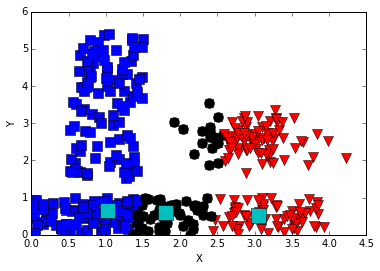

In [15]:
plt.figure(1)
#plot clusters
symbols = ['o','s','v']
colors = ['k','b','r']
markersize = 10
plotcluster(datalist,labels,symbols,colors,markersize)

#plot centroids
plt.plot( centroids[:,0],centroids[:,1], 's',color='c',markersize=15)
#labels
ax = plt.gca()
ax.set_xlabel("X")
ax.set_ylabel("Y")